### Fast data structures in non-C systems languages

In this project, sort algorithm implemented in Rust language and in parallel way for Python language in order to get performance. The main problem is binding Rust to Python in this project.

### One thread test

### Performance test for Python

In [8]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

In [4]:
# creating array for Python sorting
size = 100000000
arrayPython = np.random.randint(low = 10, high = 100, size = 100000000).flatten().tolist()
start = time.time()
sorted_array_python = sorted(arrayPython)
end = time.time() - start
print(f"Time: {end}, isSorted: {sorted(arrayPython) == sorted_array_python}")

Time: 11.64115309715271, isSorted: True


### Performance test parallelsort_rust library (Binding)

In [5]:
import parallelsort_rust
arrayRustBinding = np.random.randint(low = 10, high = 100, size = 100000000).flatten().tolist()
sizeofArray = len(arrayRustBinding)
# size of threads for parallelism
threads = 1

start = time.time()
sorted_array = parallelsort_rust.parallel_sorting(arrayRustBinding, threads, sizeofArray)
end = time.time() - start

print(f"Time: {end}, isSorted: {sorted(arrayRustBinding) == sorted_array}")

Time: 13.328720331192017, isSorted: True


performance is almost same in Python and Binding (Rust) with one thread

### 8 thread test

In [9]:
# python sort with 8 thread
!python benchmark_mergesort.py

merge_sort_parallel 313.0932559967041 True


In [6]:
arrayRustBinding = np.random.randint(low = 10, high = 100, size = 100000000).flatten().tolist()
sizeofArray = len(arrayRustBinding)
# size of threads for parallelism
threads = 8

# Rust binding sort
start = time.time()
sorted_array = parallelsort_rust.parallel_sorting(arrayRustBinding, threads, sizeofArray)
end = time.time() - start

print(f"Time: {end}, isSorted: {sorted(arrayRustBinding) == sorted_array}")

Time: 7.7150962352752686, isSorted: True


With 8 thread we are getting performance gain
- merge_sort_parallel 313.0932559967041 True (Python)
- merge_sort_parallel 7.7150962352752686, isSorted: True (Rust Binding)

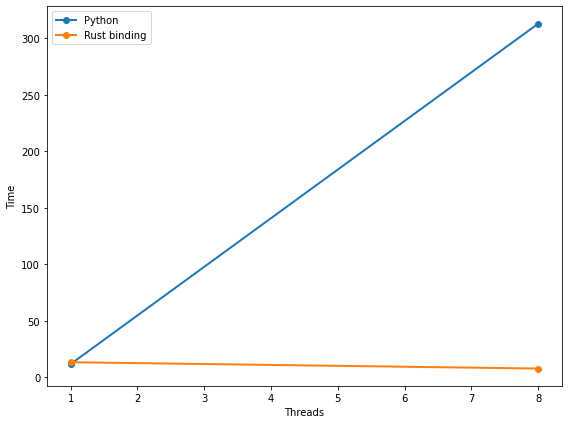

In [18]:

threads = [1, 8]

python_performance = [11.64115309715271, 313.0932559967041]
rust_binding_performance = [13.328720331192017, 7.7150962352752686]

plt.figure(figsize=(8,6), tight_layout=True)
plt.plot(threads, python_performance, 'o-', linewidth=2)
plt.plot(threads, rust_binding_performance, 'o-', linewidth=2)
plt.xlabel('Threads')
plt.ylabel('Time')

plt.legend(["Python", "Rust binding"], loc ="upper left")
  
plt.show()

### Memory Usage

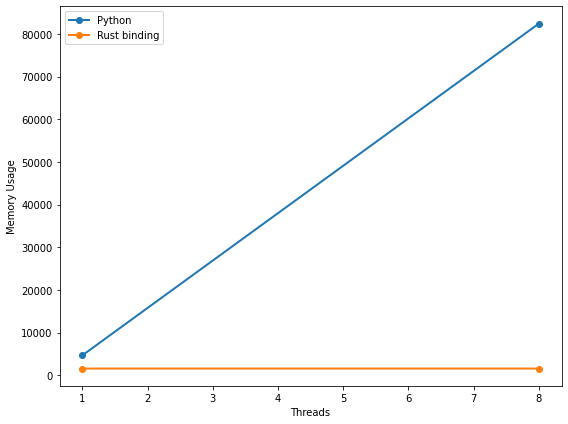

In [28]:
# MiB
RustBindedLib_memory = [1563.934, 1563]
Python_memory = [4668.609, 82432]

plt.figure(figsize=(8,6), tight_layout=True)
plt.plot(threads, Python_memory, 'o-', linewidth=2)
plt.plot(threads, RustBindedLib_memory, 'o-', linewidth=2)
plt.xlabel('Threads')
plt.ylabel('Memory Usage')

plt.legend(["Python", "Rust binding"], loc ="upper left")
  
plt.show()

### Used Resources
- [Parallel merge sort in Python](https://gist.github.com/stephenmcd/39ded69946155930c347)
- [Parallel sort in Rust](//https://stackoverflow.com/questions/65415293/implementing-a-parallel-multithreaded-merge-sort-on-vec
)